In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
print(np.isinf(X_train).sum())

from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings                                                                 
warnings.filterwarnings('ignore') 


%matplotlib inline
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

AveragePrice    0
Small           0
Large           0
XLarge          0
SmallBags       0
LargeBags       0
XLargeBags      0
dtype: int64


In [24]:
data=pd.read_csv("C:/Users/armaa/OneDrive/Documents/GitHub/Flip_robo_internship/Avocado Project/avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [25]:
data.drop("Unnamed: 0", axis=1,inplace=True)
names = ['Date', 'AveragePrice', 'TotalVolume', 'Small', 'Large', 'XLarge', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type', 'Year' ,'Region']
data = data.rename(columns=dict(zip(data.columns, names)))
data.head()

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [26]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   TotalVolume   1517 non-null   float64
 3   Small         1517 non-null   float64
 4   Large         1517 non-null   float64
 5   XLarge        1517 non-null   float64
 6   TotalBags     1517 non-null   float64
 7   SmallBags     1517 non-null   float64
 8   LargeBags     1517 non-null   float64
 9   XLargeBags    1517 non-null   float64
 10  Type          1517 non-null   object 
 11  Year          1517 non-null   float64
 12  Region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [27]:
data.describe(include='all')

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
count,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,12-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


In [79]:
df=data.dropna()
df

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016.0,Charlotte


In [45]:
df.Type.unique()

array([0])

In [46]:
df.Year.unique()

array([2015., 2016.])

<AxesSubplot:xlabel='AveragePrice', ylabel='Type'>

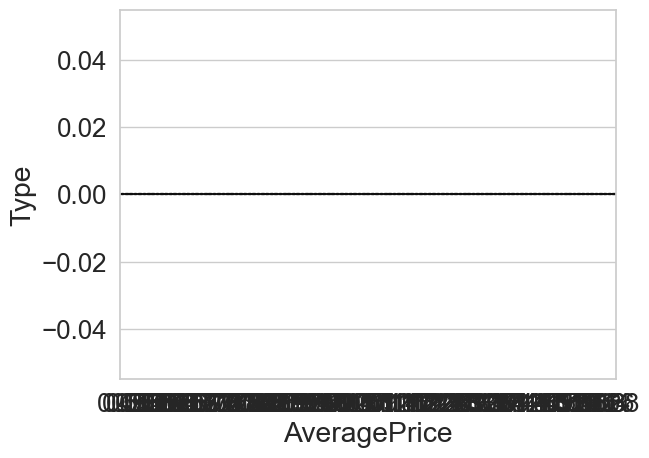

In [47]:
sns.boxplot(y="Type", x="AveragePrice", data=df, palette = 'pink')

In [80]:
label = LabelEncoder()
dicts = {}

label.fit(df.Type.drop_duplicates()) 
dicts['Type'] = list(label.classes_)
df.Type = label.transform(df.Type)

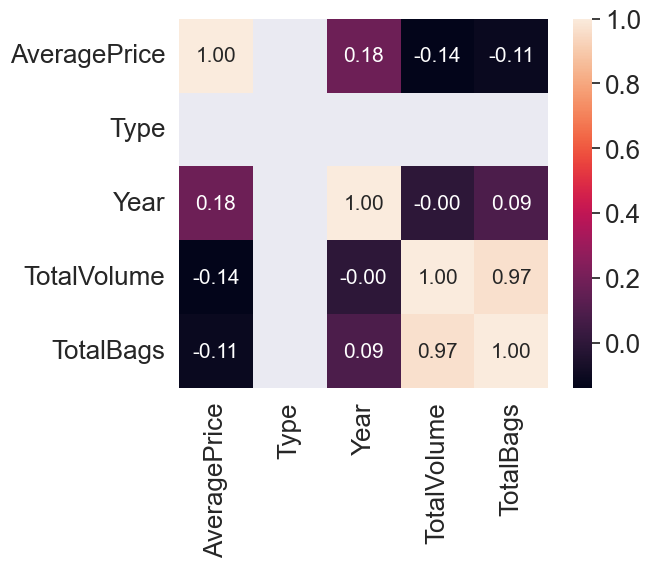

In [81]:
cols = ['AveragePrice','Type','Year','TotalVolume','TotalBags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

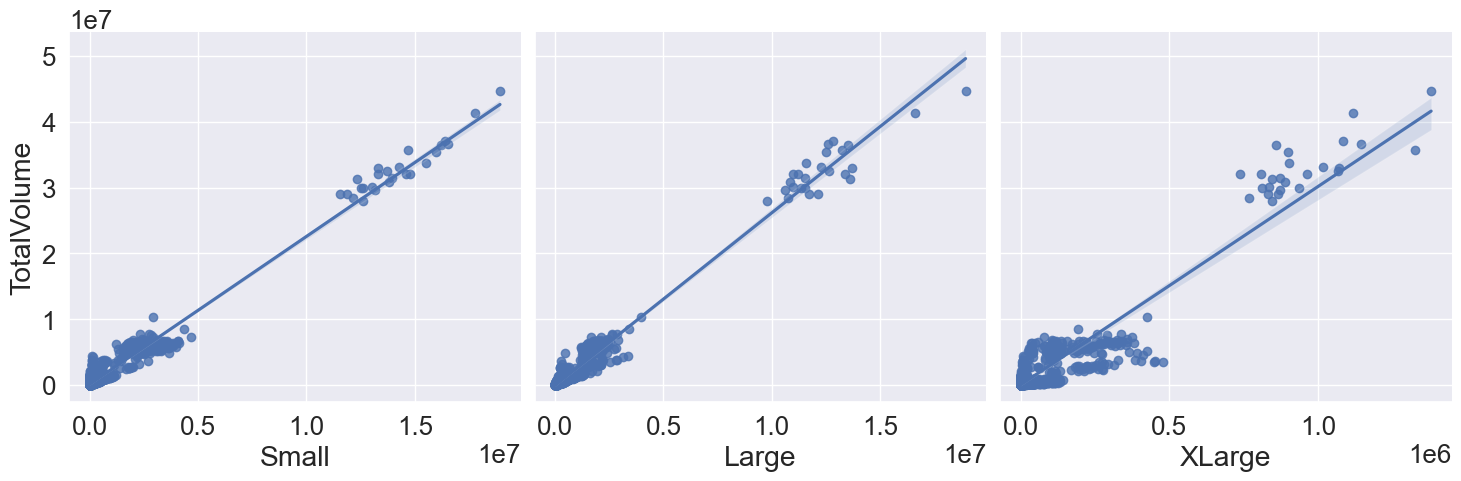

In [82]:
sns.pairplot(df, x_vars=['Small', 'Large', 'XLarge'], y_vars='TotalVolume', size=5, aspect=1, kind='reg')

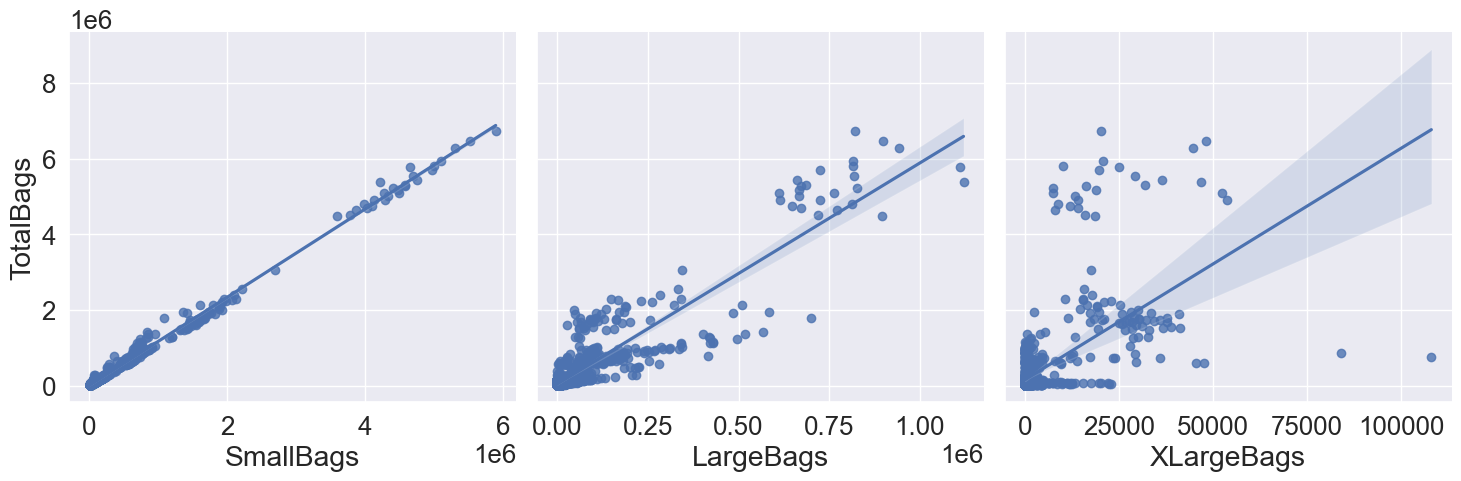

In [83]:
sns.pairplot(df, x_vars=['SmallBags', 'LargeBags', 'XLargeBags'], y_vars='TotalBags', size=5, aspect=1, kind='reg')

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

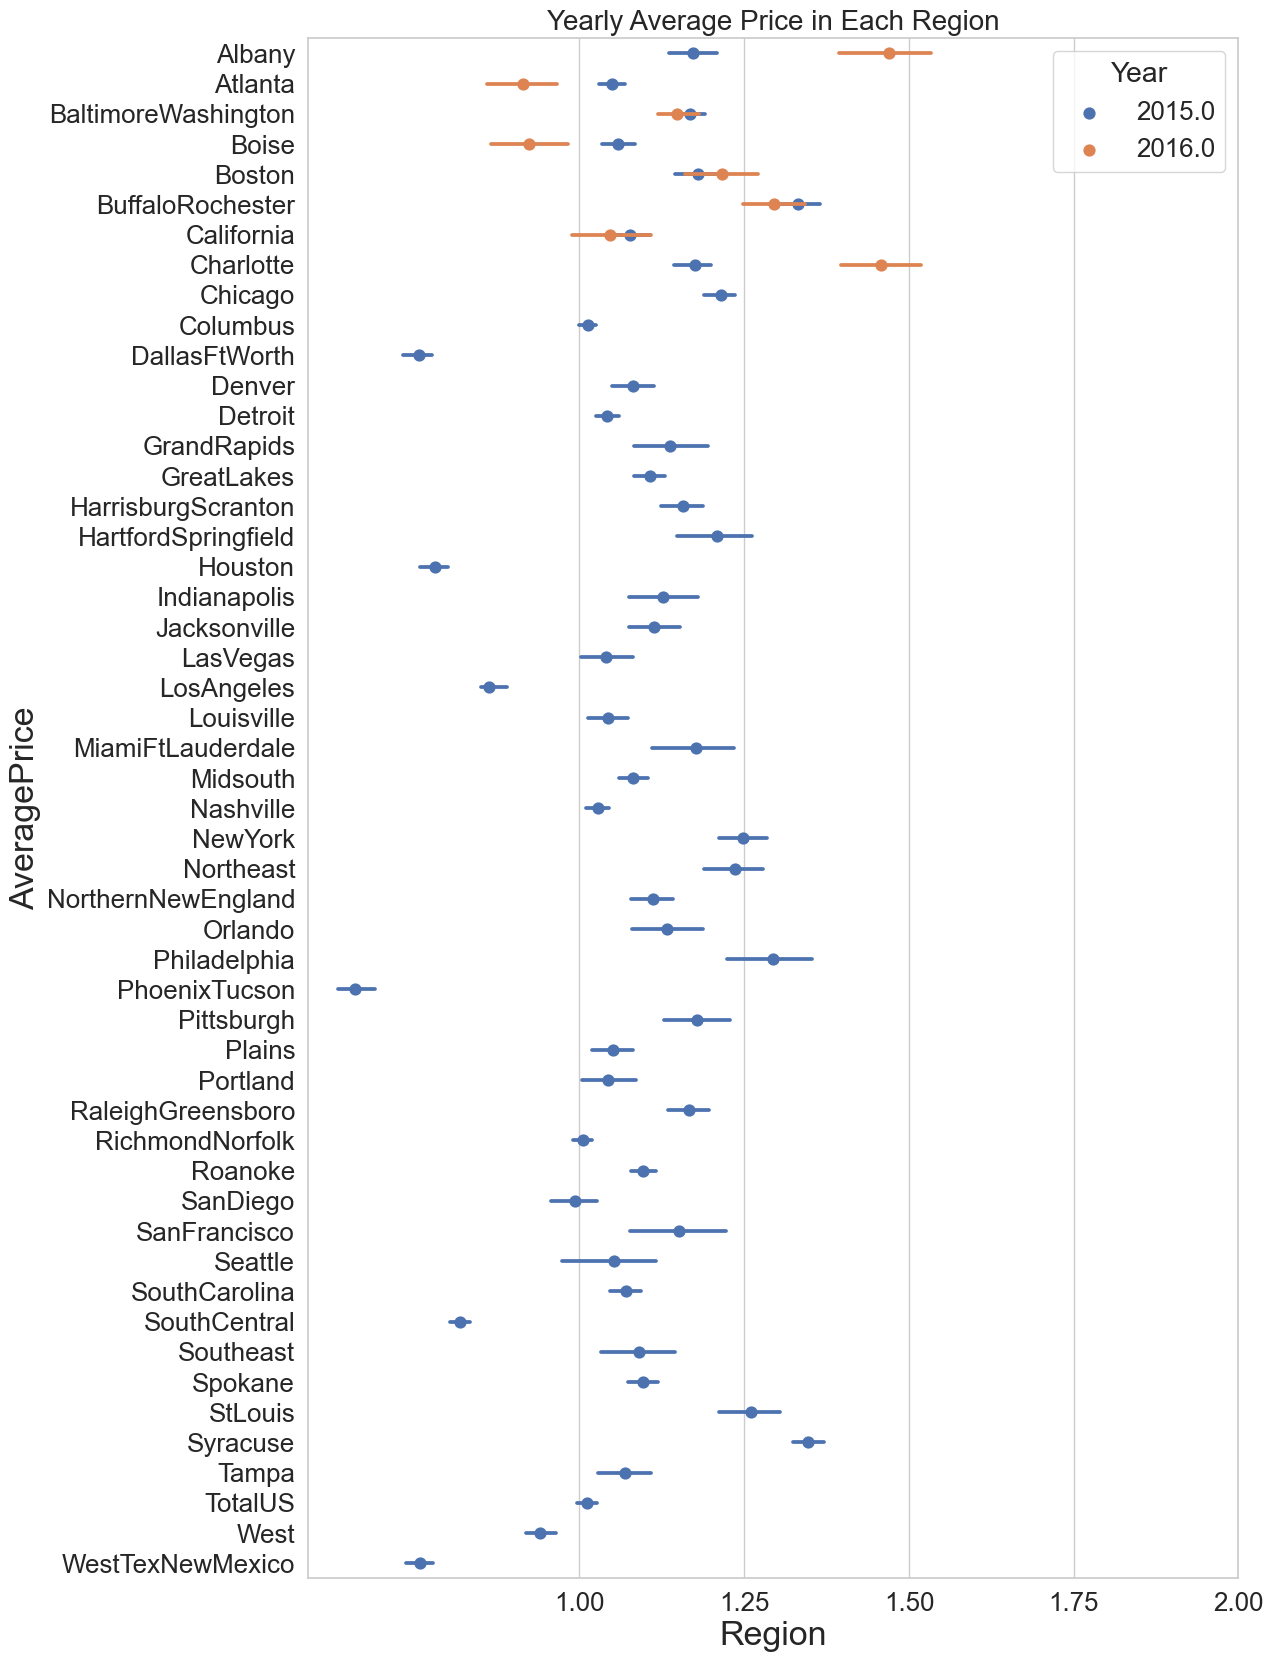

In [84]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='Region',data=data, hue='Year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Text(0.5, 1.0, 'Type Average Price in Each Region')

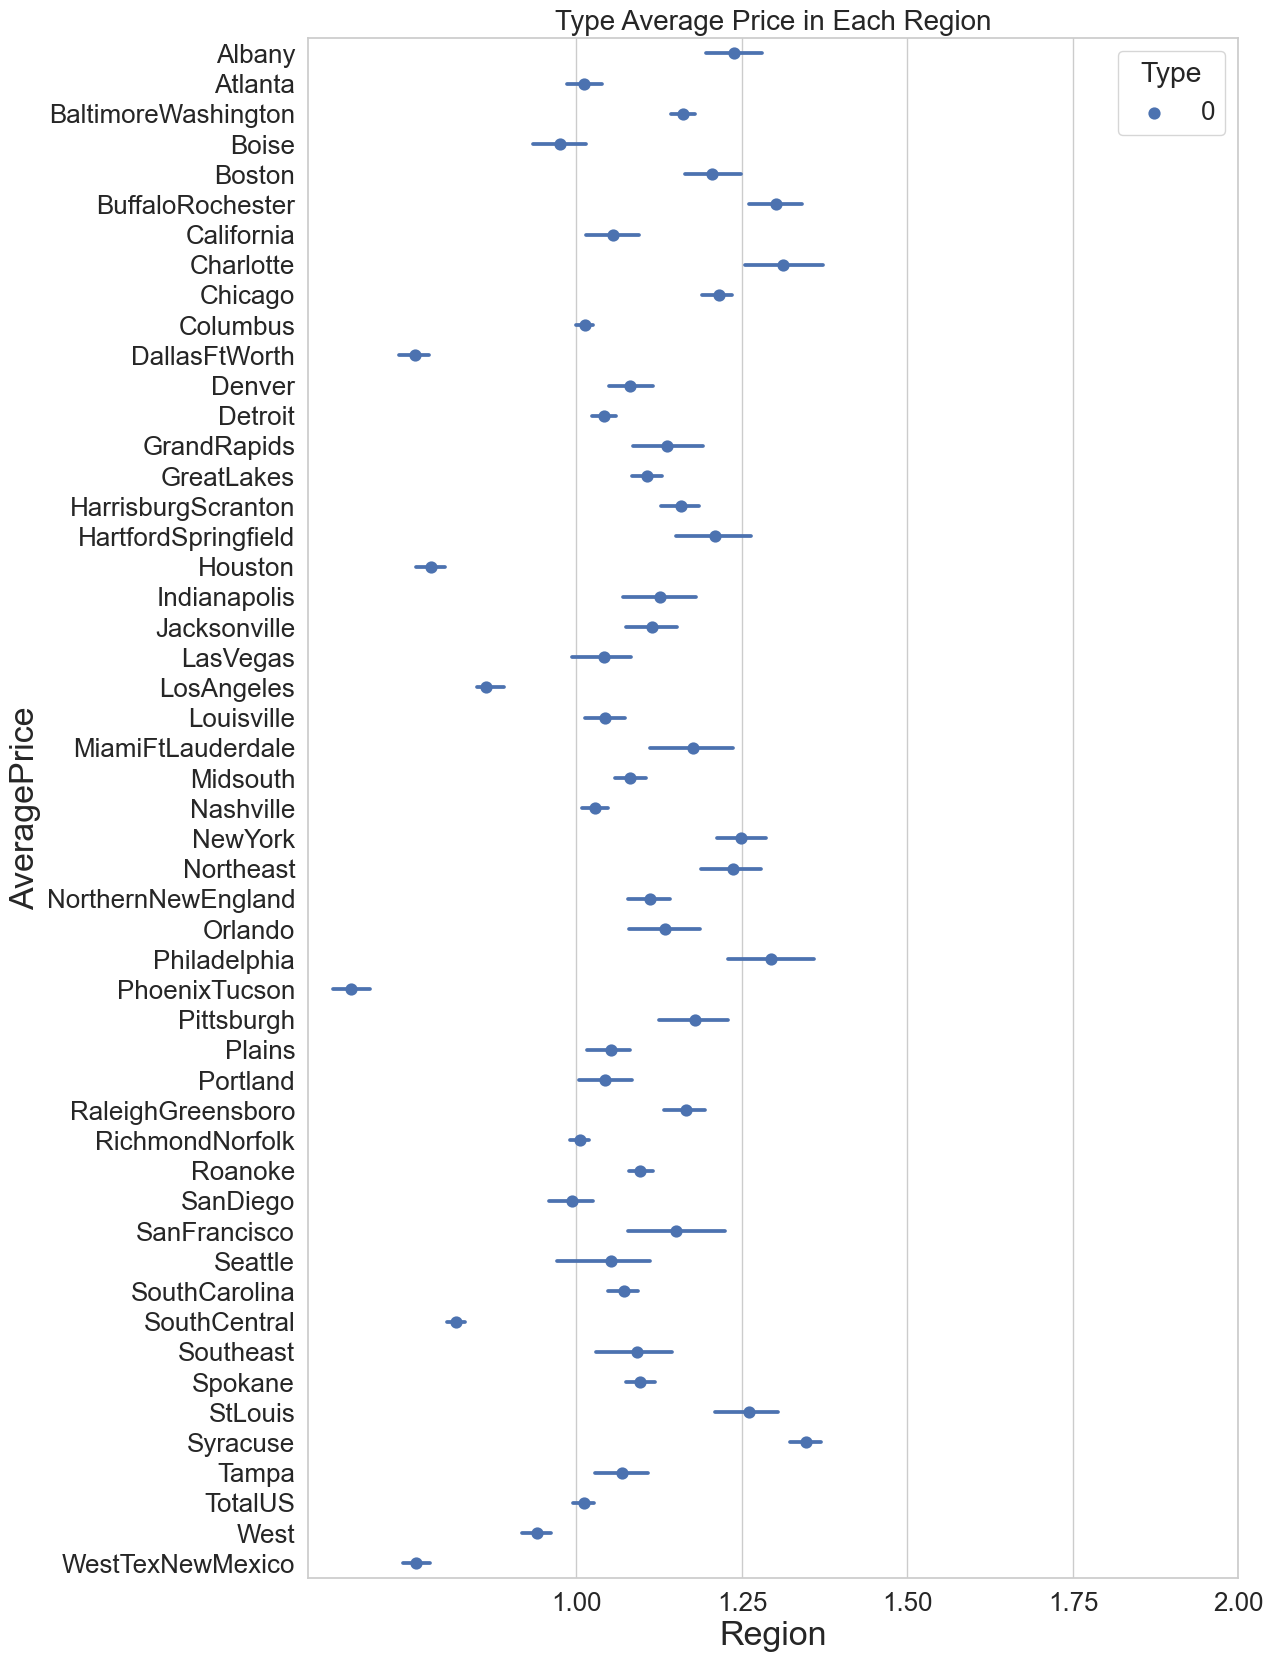

In [88]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='Region', data=df, hue='Type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

In [89]:
df['Region'].nunique()

51

In [94]:
df['Type'].nunique()

1

In [95]:
df_final=pd.get_dummies(df.drop(['Region','Date'],axis=1),drop_first=True)

In [96]:
X=df_final[['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags']] #feature columns
y=df_final.Type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (1213, 7)
Y Train Shape  (1213,)
X Test Shape  (304, 7)
Y Test Shape  (304,)


In [97]:
X_train = X_train.astype('float64')
X_train = X_train[~np.isinf(X_train).any(axis=1)]

In [98]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
unique_values_train = np.unique(y_train)
unique_values_test = np.unique(y_test)

print("Unique values in y_train:", unique_values_train)
print("Unique values in y_test:", unique_values_test)

Unique values in y_train: [0.49 0.52 0.53 0.56 0.57 0.58 0.6  0.61 0.62 0.63 0.65 0.66 0.67 0.68
 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82
 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96
 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1
 1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24
 1.25 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38
 1.39 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.51 1.52 1.53
 1.56 1.57 1.58 1.6  1.61 1.62 1.63 1.66 1.68]
Unique values in y_test: [0.51 0.53 0.54 0.56 0.57 0.61 0.64 0.65 0.67 0.68 0.74 0.75 0.76 0.77
 0.78 0.79 0.8  0.81 0.82 0.83 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06
 1.07 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2
 1.21 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34
 1.35 1.36 1.39 1.4  1.41 1.43 1.44 1.5  1.52 1.54 1

In [111]:
y_pred_train_binary = (y_pred_train > 0.5).astype(int)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

In [112]:
print("Number of samples for each class in training data:")
print(pd.Series(y_train).value_counts())

print("\nNumber of samples for each class in test data:")
print(pd.Series(y_test).value_counts())

print("Class distribution in training data:")
print(pd.Series(y_train).value_counts())

print("Class distribution in training data:")
print(pd.Series(y_train).value_counts())

print("Class distribution in test data:")
print(pd.Series(y_test).value_counts())

Number of samples for each class in training data:
1.08    38
1.10    37
1.11    35
1.09    35
1.05    34
        ..
1.58     1
1.46     1
0.68     1
1.42     1
0.69     1
Name: AveragePrice, Length: 107, dtype: int64

Number of samples for each class in test data:
1.03    13
1.07    11
0.99    10
1.04     9
1.08     8
        ..
1.39     1
1.02     1
0.56     1
0.61     1
1.44     1
Name: AveragePrice, Length: 82, dtype: int64
Class distribution in training data:
1.08    38
1.10    37
1.11    35
1.09    35
1.05    34
        ..
1.58     1
1.46     1
0.68     1
1.42     1
0.69     1
Name: AveragePrice, Length: 107, dtype: int64
Class distribution in training data:
1.08    38
1.10    37
1.11    35
1.09    35
1.05    34
        ..
1.58     1
1.46     1
0.68     1
1.42     1
0.69     1
Name: AveragePrice, Length: 107, dtype: int64
Class distribution in test data:
1.03    13
1.07    11
0.99    10
1.04     9
1.08     8
        ..
1.39     1
1.02     1
0.56     1
0.61     1
1.44     1
Name: 

In [113]:
print("Class distribution in training data:")
print(pd.Series(y_train).value_counts())

print("Class distribution in test data:")
print(pd.Series(y_test).value_counts())

Class distribution in training data:
1.08    38
1.10    37
1.11    35
1.09    35
1.05    34
        ..
1.58     1
1.46     1
0.68     1
1.42     1
0.69     1
Name: AveragePrice, Length: 107, dtype: int64
Class distribution in test data:
1.03    13
1.07    11
0.99    10
1.04     9
1.08     8
        ..
1.39     1
1.02     1
0.56     1
0.61     1
1.44     1
Name: AveragePrice, Length: 82, dtype: int64


In [114]:
print(y_train.dtype)

float64


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [123]:
print("Data type of y_train:", y_train.dtype)
print("Data type of y_test:", y_test.dtype)

Data type of y_train: float64
Data type of y_test: float64


In [124]:

import numpy as np

# Convert to NumPy arrays with integer data type
y_train = np.asarray(y_train, dtype=int)
y_test = np.asarray(y_test, dtype=int)

# Make binary predictions
y_pred_train_binary = logreg.predict(X_train_scaled)
y_pred_test_binary = logreg.predict(X_test_scaled)

# Accuracy score with binary predictions
accuracy_train = accuracy_score(y_train, y_pred_train_binary)
accuracy_test = accuracy_score(y_test, y_pred_test_binary)

print('Accuracy score for Logistic Regression training data is:', accuracy_train)
print('Accuracy score for Logistic Regression test data is:', accuracy_test)



Accuracy score for Logistic Regression training data is: 0.7477328936521023
Accuracy score for Logistic Regression test data is: 0.7401315789473685


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ... (data preprocessing)

# Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = linreg.predict(X_train_scaled)
y_pred_test = linreg.predict(X_test_scaled)

# Mean Squared Error for regression evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('Mean Squared Error for Linear Regression training data is:', mse_train)
print('Mean Squared Error for Linear Regression test data is:', mse_test)

Mean Squared Error for Linear Regression training data is: 0.029667998195357634
Mean Squared Error for Linear Regression test data is: 0.029907763118433264


In [125]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')


Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                      24                      75
Conventional                  4                     201
----------------------------------------------------------------------------------------


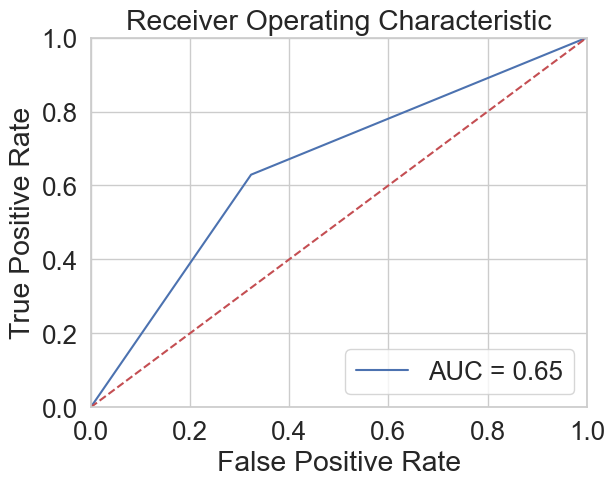

In [126]:
#AUC ROC Curve
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [127]:
#Randomforest classifier
rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

Accuracy score for test data using Random Forest : 0.875
----------------------------------------------------------------------------------------


In [128]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')


Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                      74                      25
Conventional                 13                     192
----------------------------------------------------------------------------------------


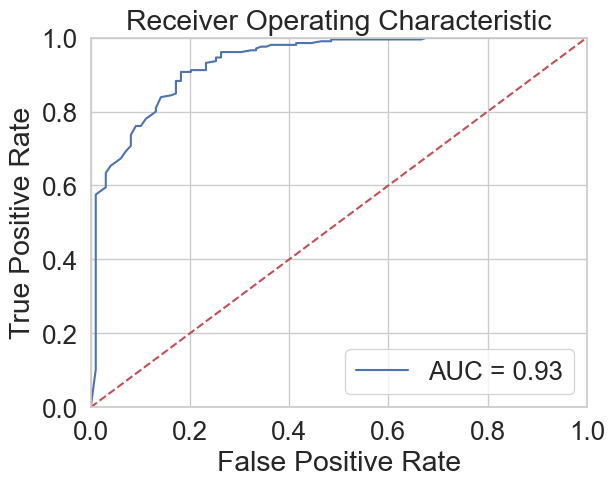

In [130]:
#AUC ROC Curve
probs = rfclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [136]:
df_final.drop(['TotalVolume', 'TotalBags', 'Year'], axis = 1,inplace = True)

In [137]:
df_final.columns

Index(['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags',
       'XLargeBags', 'Type'],
      dtype='object')

In [138]:
scaler = StandardScaler().fit(df_final)
data_avocado_scaler = scaler.transform(df_final)
data_avocado = pd.DataFrame(data_avocado_scaler)
data_avocado.columns = ['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
data_avocado.head()

,AveragePrice,Small,Large,XLarge,SmallBags,LargeBags,XLargeBags,Type
0,1.350481,-0.331490,-0.333053,-0.365608,-0.371055,-0.360044,-0.292727,0.0
1,1.456397,-0.331676,-0.338923,-0.365534,-0.369812,-0.360008,-0.292727,0.0
2,-0.767838,-0.331614,-0.300348,-0.365010,-0.371922,-0.359960,-0.292727,0.0
3,0.026531,-0.331441,-0.322576,-0.365431,-0.375576,-0.359701,-0.292727,0.0
4,1.085691,-0.331539,-0.339401,-0.365408,-0.375098,-0.359160,-0.292727,0.0


In [139]:
feature_cols = ['Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
X = data_avocado[feature_cols]

In [140]:
y = data_avocado.AveragePrice

In [141]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [142]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1213, 7)
y_train shape:  (1213,)

Test cases as below
X_test shape:  (304, 7)
y_test shape:  (304,)


In [143]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test) 


        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions make predictions on the testing set
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [144]:
linreg = linear_reg(X,y)

In [145]:
linreg.score(X,y)

0.15107455558791616

In [146]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 0.014791851611903014
Coefficients: [-1.03469505  0.92626323  0.01042952  0.33268363 -0.34401057 -0.07611892
  0.        ]


In [147]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [148]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.014791851611903014
Small -1.0346950515737712
Large 0.9262632287545681
XLarge 0.01042952293041352
SmallBags 0.3326836329331364
LargeBags -0.34401057157634607
XLargeBags -0.07611892064068004
Type 0.0


In [149]:
y_pred_train = linreg.predict(X_train)

In [150]:
y_pred_test = linreg.predict(X_test)

In [151]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')


RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.702278219602145
MAE for test set is 0.6653271940335154
----------------------------------------------------------------------------------------
MSE for training set is 0.8618942095590179
MSE for test set is 0.7971783650593508
----------------------------------------------------------------------------------------
RMSE for training set is 0.9283825771518
RMSE for test set is 0.8928484558195476


In [152]:
print("Model Evaluation for Linear Regression Model")

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model
----------------------------------------------------------------------------------------
r_squared for train data  0.13515154851190014  and adjusted_r_squared for train data 0.1301275326111393
----------------------------------------------------------------------------------------
r_squared for test data  0.21040483854067282  and adjusted_r_squared for test data 0.19173197999264824


In [153]:
feature_cols = ['Small', 'SmallBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.058634107975979156
RMSE for the test set is 0.9192408100214022


In [154]:
feature_cols = ['Large', 'LargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.03798686421390862
RMSE for the test set is 0.9381450690203481


In [155]:
feature_cols = ['XLarge', 'XLargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  -0.0033183823663766932
RMSE for the test set is 1.0014757397615757


In [156]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

In [157]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.17578659485859682  and RMSE for test set is 0.3941848100036717
----------------------------------------------------------------------------------------
r_squared for train data  0.9689931565727263  and adjusted_r_squared for train data 0.9688130338308252
----------------------------------------------------------------------------------------
r_squared for test data  0.8460964123000054  and adjusted_r_squared for test data 0.8424568004287217
